In [1]:
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from notebooks.analytics.utils import init_analysis, savefig, boxplot_metric

In [2]:
#EXP_NAME = "daeclust_2000_05-clusters" # multi clusters, tol: 2, all fixed same setup as fed_avg_08
#EXP_NAME = "daeclust_2000_06-clusters" # multi clusters, tol: 2, all fixed
#EXP_NAME = "daeclust_2000_07-clusters" # multi clusters, tol: 2, all fixed
#EXP_NAME = "daeclust_09-clusters" # multi clusters, tol: 2, all fixed

#EXP_NAME = "daeclust_12-clusters"
#EXP_NAME = "daeclust_16-clusters"
#EXP_NAME = "daeclust_17_00-clusters"
#EXP_NAME = "daeclust_18_00-clusters"
EXP_NAME = "daeclust_15-clusters"
df = init_analysis(EXP_NAME)

C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:80: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()
C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:88: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()
C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:88: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()


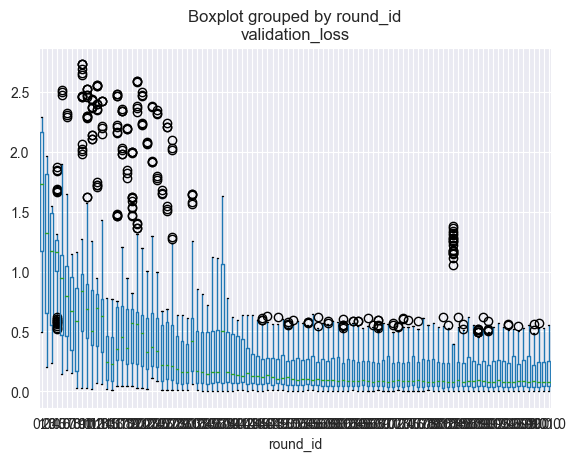

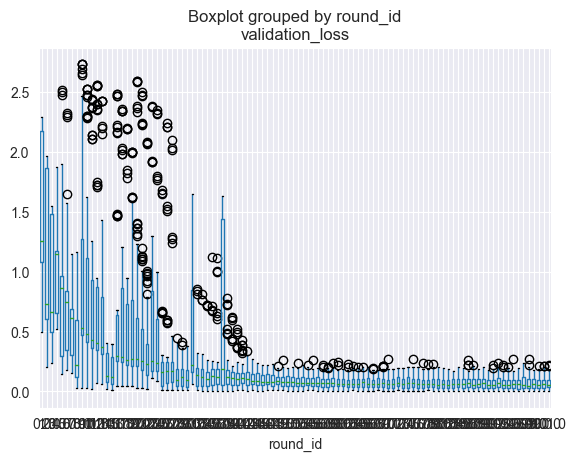

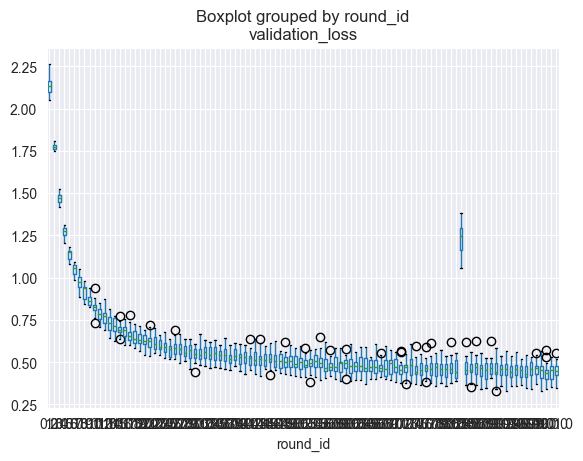

In [3]:
boxplot_metric(df, "validation_loss")

C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:80: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()
C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:88: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()
C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:88: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()


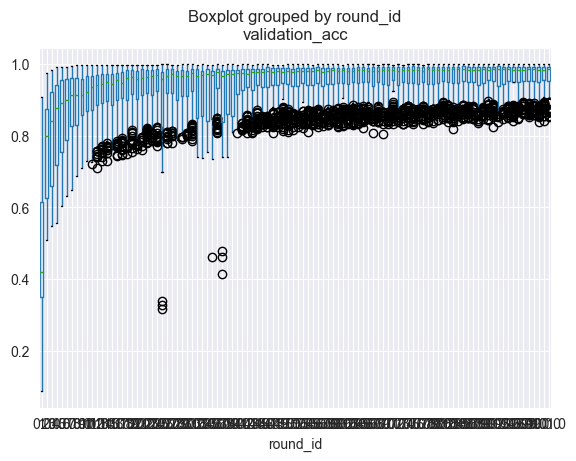

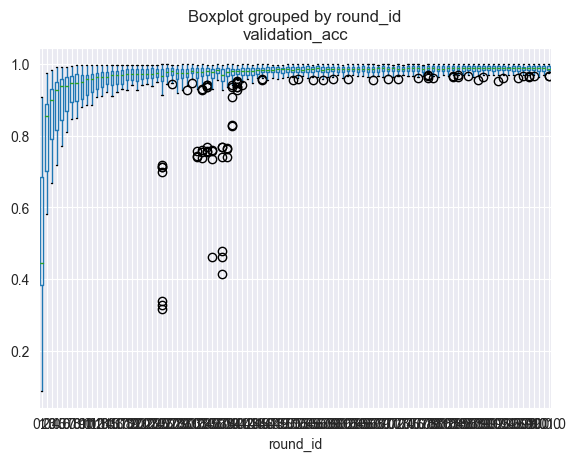

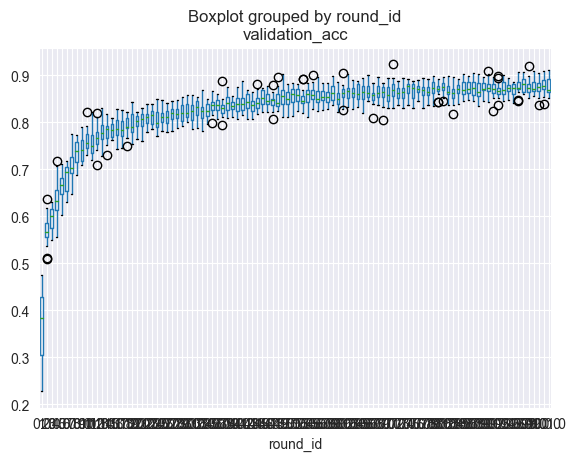

In [4]:
boxplot_metric(df, "validation_acc")

In [5]:
dataset_perf = df.loc[df.round_id < 32].groupby(["round_id","dataset"])
dataset_perf["validation_loss"].mean()

round_id  dataset
0.0       fmnist     2.135519
          mnist      1.468923
1.0       fmnist     1.698616
          mnist      0.941554
2.0       fmnist     1.420912
                       ...   
29.0      mnist      0.134394
30.0      fmnist     0.518693
          mnist      0.265503
31.0      fmnist     0.512351
          mnist      0.146942
Name: validation_loss, Length: 64, dtype: float64

C:\Users\micdu\AppData\Local\Temp\ipykernel_23616\1895144522.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cluster_count_fig.show()


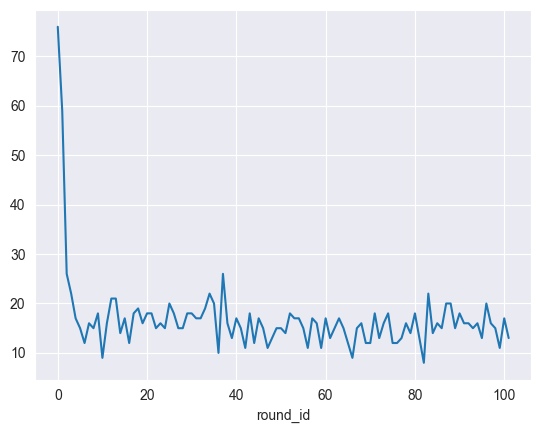

In [6]:
cluster_count_ax = df.groupby("round_id")["cluster_id"].nunique().plot()
cluster_count_fig = cluster_count_ax.get_figure()
savefig(cluster_count_fig, "cluster_count")
cluster_count_fig.show()

In [7]:
n_clusters = df.groupby("round_id")["cluster_id"].nunique()
loss = df.groupby("round_id")["validation_loss"].mean()

np.corrcoef(loss, n_clusters)

array([[1.        , 0.70414449],
       [0.70414449, 1.        ]])

In [8]:
np.corrcoef(loss[1:], n_clusters[:len(n_clusters)-2])

array([[1.        , 0.64998973],
       [0.64998973, 1.        ]])

In [9]:
#EXP_NAME = "daeclust_2000_05-clusters-selection"
#EXP_NAME = "daeclust_2000_07-clusters-selection"
#EXP_NAME = "daeclust_11-clusters-selection"
#EXP_NAME = "daeclust_12-clusters-selection"
#EXP_NAME = "daeclust_13-clusters-selection"
EXP_NAME = "daeclust_15-clusters-selection"

df = init_analysis(EXP_NAME)

In [10]:
df_fed_avg = init_analysis("fed_avg_12")

In [11]:
grouped_fed_avg = df_fed_avg.groupby(["cluster_id","round_id","dataset"])["test_loss"].mean().reset_index()
grouped_fed_avg

,cluster_id,round_id,dataset,test_loss
0,global,0.0,mnist,NaN
1,global,1.0,fmnist,0.069525
2,global,1.0,mnist,0.023990
3,global,2.0,fmnist,0.040927
4,global,2.0,mnist,0.021671
...,...,...,...,...
200,global,100.0,mnist,0.003567
201,global,101.0,fmnist,0.009397
202,global,101.0,mnist,0.003508
203,global,102.0,fmnist,0.009342


In [12]:
grouped = df.groupby(["cluster_id","round_id","dataset"])["test_loss"].mean().reset_index()
grouped

,cluster_id,round_id,dataset,test_loss
0,000fbf3f931111becd2234b8dc4faad9db38c7b277d315...,14.0,fmnist,4.609609
1,000fbf3f931111becd2234b8dc4faad9db38c7b277d315...,14.0,mnist,0.293893
2,0089adec0eda7d09b32842371b44fa314f3a69c81baf00...,20.0,fmnist,0.607641
3,0089adec0eda7d09b32842371b44fa314f3a69c81baf00...,20.0,mnist,4.684566
4,00b0cc3cf5d7b27b3fe876f56eeaa4bac2d8940d0343bb...,85.0,fmnist,0.419909
...,...,...,...,...
3031,feb9e94ec0578bea00e5ae76c5122585beeef6779997b5...,40.0,mnist,4.150458
3032,ff6ff1e901cb97d1e08cc76d4bc113c7a0259058bdfcfd...,22.0,fmnist,5.249417
3033,ff6ff1e901cb97d1e08cc76d4bc113c7a0259058bdfcfd...,22.0,mnist,0.189402
3034,ffd28053de8950294c20e79f61c49a879c58547f690413...,82.0,mnist,0.145413


In [13]:
pd.concat([grouped, grouped_fed_avg]).loc[grouped.round_id == 100].groupby(["cluster_id", "dataset"]).mean()

round_id  \
cluster_id                                         dataset             
09286ed026338ad97eb3214d40cd4ebe3e10c90a05612b0... fmnist      100.0   
                                                   mnist       100.0   
1ed9e47381647bb2e601a503276f91542383c949bff089f... fmnist      100.0   
                                                   mnist       100.0   
271855460f7ce9a48c47e0585c41cdf57eda78e8d579019... fmnist      100.0   
                                                   mnist       100.0   
293188aa9084ac6e3964554855330d2de9edb55e14edcd7... fmnist      100.0   
                                                   mnist       100.0   
2f3a63b4c08c9239d5cba1eba8f3be18ec2c2dc330a2ba5... fmnist      100.0   
                                                   mnist       100.0   
35f0ed56d5518319c49f2925f59eccbba0ac60e6c6bca0a... fmnist      100.0   
                                                   mnist       100.0   
3e218d7e4948f3dbb61d82e61520358d76c3068b2218f3b... mnist       100.0   
42082e3532d4b665fed32a99e90a02b20c8eaf389dd8143... fmnist      100.0   
                                                   mnist       100.0   
422e7f6f9728300ee274ee26c6c0dd246b9512659ca1d41... fmnist      100.0   
                                                   mnist       100.0   
5e63ee0e7c7d05647eacc8e7e86d02f452fe4c2bf437e74... fmnist      100.0   
                                                   mnist       100.0   
63e2ee51947235665abf701bf2a015789ed6e75c06c2d0e... fmnist      100.0   
                                                   mnist       100.0   
680516b3c351db7f554a6740e09e967bc53c2c3289ac61d... fmnist      100.0   
                                                   mnist       100.0   
7fbd1e83cb8bda24ff0dab1068f2f96638bc362e726fcef... fmnist      100.0   
                                                   mnist       100.0   
83b21bc8a60c945944d39ff898dc542f88cc5b5c5468a0f... fmnist      100.0   
                                                   mnist       100.0   
a646620ca0a91c2aa22b76bdbc3670d4579171aed483c49... mnist       100.0   
c2bcc05199071228c9b002d4e24dfb22a6412e3bf32a9be... fmnist      100.0   
                                                   mnist       100.0   
e3429c9db0f7382fd166416628b17fda96e3743dc9d6f5b... fmnist      100.0   
                                                   mnist       100.0   
ec61340edd8c82d4eed9deb34db4579c7a97cbe06d3d2aa... fmnist      100.0   
                                                   mnist       100.0   
ee80a34f1ed99073791446d3b7c2b9f258f5bf21590ee6b... fmnist      100.0   
                                                   mnist       100.0   
global                                             fmnist       47.0   
                                                   mnist        47.0   

                                                            test_loss  
cluster_id                                         dataset             
09286ed026338ad97eb3214d40cd4ebe3e10c90a05612b0... fmnist    0.411287  
                                                   mnist     4.851331  
1ed9e47381647bb2e601a503276f91542383c949bff089f... fmnist    5.755750  
                                                   mnist     0.080364  
271855460f7ce9a48c47e0585c41cdf57eda78e8d579019... fmnist    0.404940  
                                                   mnist     4.909901  
293188aa9084ac6e3964554855330d2de9edb55e14edcd7... fmnist    0.410875  
                                                   mnist     4.884546  
2f3a63b4c08c9239d5cba1eba8f3be18ec2c2dc330a2ba5... fmnist    5.675190  
                                                   mnist     0.066328  
35f0ed56d5518319c49f2925f59eccbba0ac60e6c6bca0a... fmnist    5.746293  
                                                   mnist     0.084658  
3e218d7e4948f3dbb61d82e61520358d76c3068b2218f3b... mnist     0.127049  
42082e3532d4b665fed32a99e90a02b20c8eaf389dd8143... fmnist    0.417231  
                           

ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of ticklabels (3).

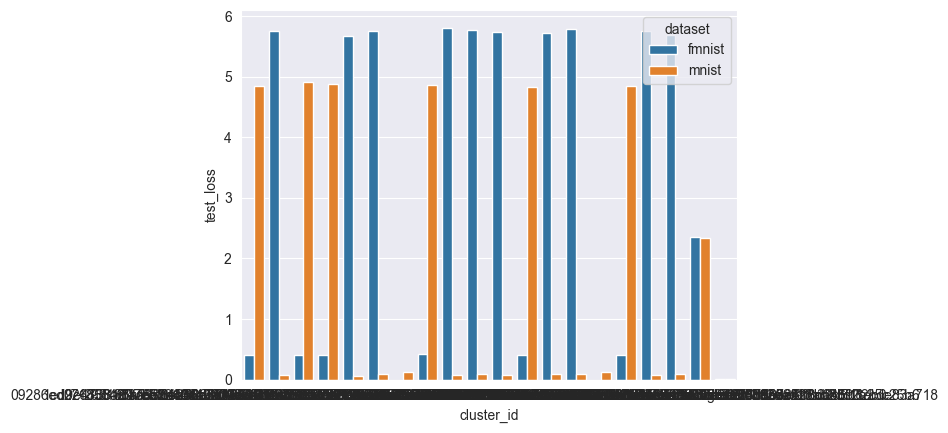

In [14]:
import seaborn as sns

ax = sns.barplot(data=pd.concat([grouped, grouped_fed_avg]).loc[grouped.round_id == 100],
            x="cluster_id", hue="dataset", y="test_loss")
ax.set_xticklabels(["MNIST Cluster", "FMNIST Cluster", "Global model"])
plt.title("Perte par modèle")
plt.xlabel("Groupe")
plt.ylabel("Perte")
savefig(plt, "loss_per_cluster")
plt.show()

In [ ]:
df.groupby(["round_id", "cluster_id", "dataset"]).mean()

In [ ]:
boxplot_metric(df, "test_acc")